## Imports

In [1]:
using DataFrames
using CSV
using Plots

## Pegando o DataFrame principal

In [3]:
data = DataFrames.DataFrame(CSV.File("res/minimum_results.csv"))

,test,type,interactions,elapsed_time,find_type
,String,String,Int64,Float64,String
1,test_base,memalloc,1,0.01,first_fit
2,test_base,memalloc,1,0.007,worst_fit
3,test_base,memalloc,1,0.007,null
4,test_base,std,1,0.0,std
5,test_base,memalloc,11,0.011,first_fit
6,test_base,memalloc,11,0.008,worst_fit
7,test_base,memalloc,11,0.009,null
8,test_base,std,11,0.0,std
9,test_base,memalloc,21,0.007,first_fit


## Gerando DataFrames separados para cada tipo de teste

In [4]:
test_base              = filter(row -> row.test == "test_base", data)
test_alloc_and_dealloc = filter(row -> row.test == "test_alloc_and_dealloc", data)
test_alloc             = filter(row -> row.test == "test_alloc", data)
test_overlap           = filter(row -> row.test == "test_overlap", data)
test_intensive_overlap = filter(row -> row.test == "test_intensive_overlap", data)


@show nrow(data)
@show nrow(test_base)
@show nrow(test_alloc_and_dealloc)
@show nrow(test_alloc)
@show nrow(test_overlap)
@show nrow(test_intensive_overlap)

nrow(data) = 8220
nrow(test_base) = 2004
nrow(test_alloc_and_dealloc) = 2004
nrow(test_alloc) = 2004
nrow(test_overlap) = 2004
nrow(test_intensive_overlap) = 204


204

## Função de Plot genérica

In [5]:
function get_plot(selected_test, title::String)
    filter_ff = filter(row -> row.find_type == "first_fit", selected_test)
    filter_wf = filter(row -> row.find_type == "worst_fit", selected_test)
    filter_nl = filter(row -> row.find_type == "null", selected_test)
    filter_std = filter(row -> row.type == "std", selected_test)

    p = plot(filter_ff[!,"interactions"], filter_ff[!,"elapsed_time"], xlabel="Interactions", ylabel="Elapsed Time", title=title, label="Memalloc - First Fit")
    plot!(filter_wf[!,"interactions"], filter_wf[!,"elapsed_time"], xlabel="Interactions", ylabel="Elapsed Time", label="Memalloc - Worst Fit")
    plot!(filter_nl[!,"interactions"], filter_nl[!,"elapsed_time"], xlabel="Interactions", ylabel="Elapsed Time", label="Memalloc - Null")
    plot!(filter_std[!,"interactions"], filter_std[!,"elapsed_time"], xlabel="Interactions", ylabel="Elapsed Time", label="Std")
    
    return p;
end

get_plot (generic function with 1 method)

## Plots

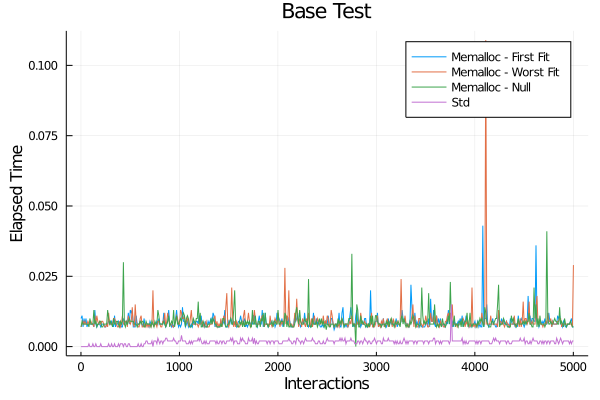

In [14]:
test_base.elapsed_time .= ifelse.(test_base.elapsed_time .> 0.12, 0.0, test_base.elapsed_time)

p = get_plot(test_base, "Base Test")
savefig("graphs/I_Base_Test.png")
p

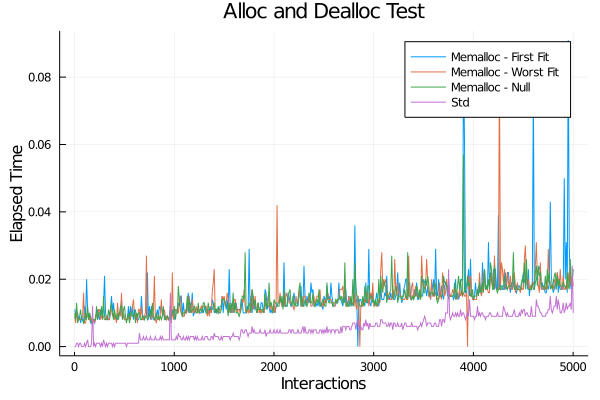

In [15]:
test_alloc_and_dealloc.elapsed_time .= ifelse.(test_alloc_and_dealloc.elapsed_time .> 0.1, 0.0, test_alloc_and_dealloc.elapsed_time)

p = get_plot(test_alloc_and_dealloc, "Alloc and Dealloc Test")
savefig("graphs/I_Alloc_Dealloc_Test.png")
p

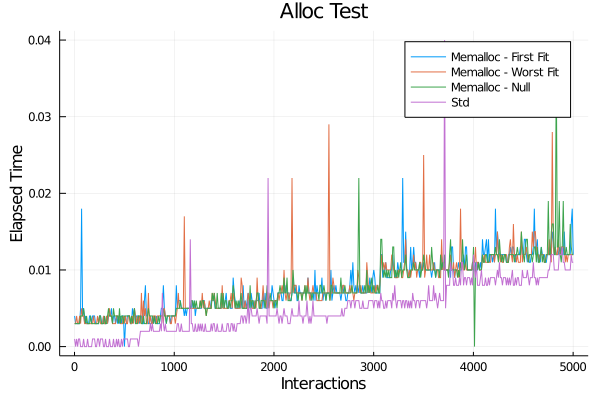

In [16]:
test_alloc.elapsed_time .= ifelse.(test_alloc.elapsed_time .> 0.05, 0.0, test_alloc.elapsed_time)

p = get_plot(test_alloc, "Alloc Test")
savefig("graphs/I_Alloc_Test.png")
p

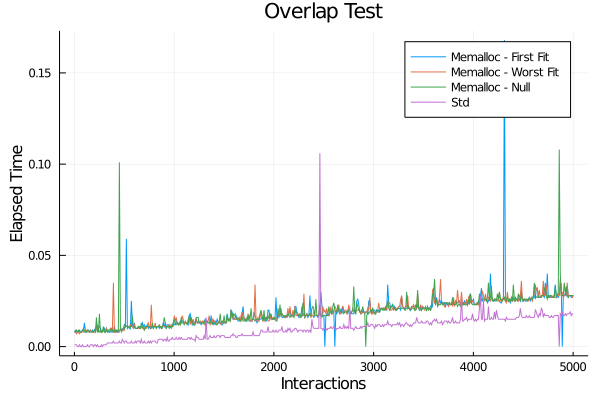

In [17]:
test_overlap.elapsed_time .= ifelse.(test_overlap.elapsed_time .> 0.2, 0.0, test_overlap.elapsed_time)

p = get_plot(test_overlap, "Overlap Test")
savefig("graphs/I_Overlap_Test.png")
p

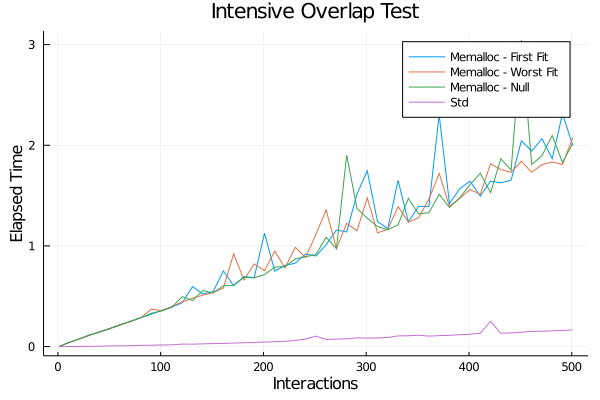

In [18]:
p = get_plot(test_intensive_overlap, "Intensive Overlap Test")
savefig("graphs/I_Intensive_Overlap_Test.png")
p